In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\keert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Exploring the Data
import pandas as pd

df = pd.read_csv('Recipe Reviews and User Feedback Dataset.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Unnamed: 0  recipe_number  recipe_code         recipe_name  \
0           0              1        14299  Creamy White Chili   
1           1              1        14299  Creamy White Chili   
2           2              1        14299  Creamy White Chili   
3           3              1        14299  Creamy White Chili   
4           4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1     Mark467      

In [7]:
# Data Cleaning and Preprocessing
import nltk
import os
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 

nltk_data_dir = os.path.join(os.path.expanduser("~"), "nltk_data")
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)
if nltk_data_dir not in nltk.data.path:
    nltk.data.path.append(nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir, quiet=True)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # This tokenizer will split the text into words of 1 or more letters
    # and will ignore punctuation and numbers automatically.
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

    text = text.lower()  
    words = tokenizer.tokenize(text) 
    
    
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]
    
    return " ".join(words)

print("Starting the data cleaning process with the new tokenizer...")

df.dropna(subset=['text'], inplace=True)

df['cleaned_text'] = df['text'].apply(clean_text)

print("Data cleaning is complete!")
print("\nHere are some examples of the cleaned text:")
print(df[['text', 'cleaned_text']].head())

Starting the data cleaning process with the new tokenizer...
Data cleaning is complete!

Here are some examples of the cleaned text:
                                                text  \
0  I tweaked it a little, removed onions because ...   
1  Bush used to have a white chili bean and it ma...   
2  I have a very complicated white chicken chili ...   
3  In your introduction, you mentioned cream chee...   
4  Wonderful! I made this for a &#34;Chili/Stew&#...   

                                        cleaned_text  
0  tweaked little removed onions onion haters hou...  
1  bush used white chili bean made recipe super s...  
2  complicated white chicken chili recipe made ye...  
3  introduction mentioned cream cheese none liste...  
4  wonderful made chili stew night dinner church ...  


In [9]:
# Feature Engineering and Selection
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(max_features=5000)

print("Vectorizing the text data...")

X_text = vectorizer.fit_transform(df['cleaned_text']).toarray()
print("Text vectorization complete.")

X_numerical = df[['user_reputation', 'reply_count', 'thumbs_up']].values

X = np.hstack([X_text, X_numerical])

y = df['stars']

print(f"\nFeature set created with shape: {X.shape}")
print(f"Target variable created with shape: {y.shape}")

Vectorizing the text data...
Text vectorization complete.

Feature set created with shape: (18180, 5003)
Target variable created with shape: (18180,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
print("\nTraining the model... (This may take a few minutes)")
model.fit(X_train, y_train)
print("Model training complete!")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training data shape: (14544, 5003)
Testing data shape: (3636, 5003)

Training the model... (This may take a few minutes)
Model training complete!

Model Accuracy: 77.31%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.13      0.22       334
           1       0.50      0.10      0.16        51
           2       0.00      0.00      0.00        35
           3       0.60      0.05      0.10       110
           4       0.87      0.04      0.07       356
           5       0.77      1.00      0.87      2750

    accuracy                           0.77      3636
   macro avg       0.58      0.22      0.24      3636
weighted avg       0.76      0.77      0.69      3636



Training Logistic Regression...
  -> Accuracy: 76.87%

Training Linear SVC...
  -> Accuracy: 76.27%

Training Multinomial NB...
  -> Accuracy: 74.39%

Training Random Forest...
  -> Accuracy: 77.31%

The best performing model is 'Random Forest' with an accuracy of 77.31%.

A bar chart comparing the models has been saved as 'model_comparison.png'.


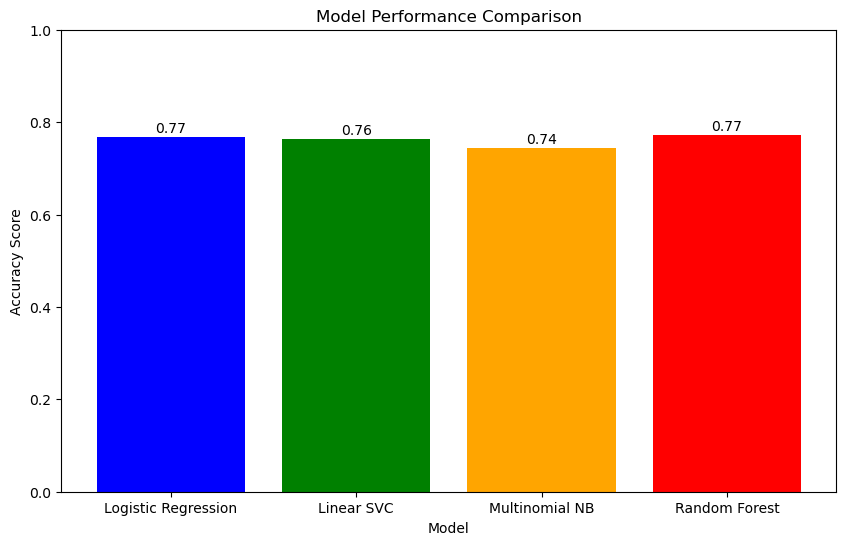

In [13]:
# Building and Training The Model
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC(dual=False), # dual=False is recommended when n_samples > n_features
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

model_performance = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[name] = accuracy
    print(f"  -> Accuracy: {accuracy * 100:.2f}%\n")

best_model_name = max(model_performance, key=model_performance.get)
best_model_score = model_performance[best_model_name]

print(f"The best performing model is '{best_model_name}' with an accuracy of {best_model_score * 100:.2f}%.")


plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1.0) 


for i, (name, score) in enumerate(model_performance.items()):
    plt.text(i, score + 0.01, f'{score:.2f}', ha = 'center')


plt.savefig('model_comparison.png')

print("\nA bar chart comparing the models has been saved as 'model_comparison.png'.")


In [15]:
#Conclusion

if 'best_model_name' in locals() and 'best_model_score' in locals():
    print("\n  Conclusion:")
    print(f"The '{best_model_name}' model performed best with an Accuracy Score of {best_model_score:.4f}.")
    print("This indicates it was the most effective model for predicting star ratings based on the provided data.")
    
    print("\nKey findings from the feature set used:")
    print("- A combination of the review text (what the user wrote) and user metadata (like reputation, replies, and thumbs-up counts) were influential predictors of the final star rating.")
    
else:
    print("\n#  Conclusion: No conclusion available because the model comparison results were not found.")


  Conclusion:
The 'Random Forest' model performed best with an Accuracy Score of 0.7731.
This indicates it was the most effective model for predicting star ratings based on the provided data.

Key findings from the feature set used:
- A combination of the review text (what the user wrote) and user metadata (like reputation, replies, and thumbs-up counts) were influential predictors of the final star rating.
